In [1]:
import pandas as pd
epa = pd.read_csv('epa_violations.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
cols = [col for col in epa.columns]
penalty_amt = 'Penalty Amount Adjusted For Eliminating Multiple Counting'

# create a new row with penalty amount as int
penalty_int = [int(entry.replace('$', '').replace(',','')) for entry in epa[penalty_amt]]
epa['penalty_amt'] = penalty_int

,Company,Parent Company,Penalty Amount,Subtraction From Penalty,Penalty Amount Adjusted For Eliminating Multiple Counting,Penalty Year,Penalty Date,Primary Offense,Secondary Offense,Description,...,Major Industry of Parent,Specific Industry of Parent,Info Source,Info Source Archive URL,PACER Link,Captured Document,EPA/OSHA More Info Link,Notes,penalty_amt,normalized_amt
0,5N Plus Inc.,NaN,"$61,150",$0,"$61,150",2013,20130328,environmental violation,NaN,"A Fairfield, Conn. company that develops and p...",...,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0c0af...,screenshot_99713.png,NaN,NaN,NaN,NaN,61150,-0.016696
1,A&L Cesspool Service Corporation,NaN,"$900,000",$0,"$900,000",2016,20161026,environmental violation,NaN,A&L Cesspool Service Corporation pled guilty a...,...,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,chunk_1screenshot_734000_6334526091881956598.png,NaN,NaN,NaN,NaN,900000,-0.006901
2,A-1 Barrel,NaN,"$15,125",$0,"$15,125",2012,20120911,environmental violation,NaN,"A-1 Barrel Company, LLC is a used drum washing...",...,NaN,NaN,http://cfpub.epa.gov/compliance/criminal_prose...,screenshot_100029.png,NaN,NaN,NaN,NaN,15125,-0.017234
3,"A-1 Petroleum and Propane, Inc.",NaN,"$40,000",$0,"$40,000",2015,20151001,environmental violation,NaN,"A-1 Petroleum and Propane, Inc., located in El...",...,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/21b89...,screenshot_100095.png,NaN,NaN,NaN,NaN,40000,-0.016943
4,"A-1 Restaurant Services, L.L.C.",NaN,"$200,000",$0,"$200,000",2016,20151119,environmental violation,NaN,NaN,...,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,screenshot_194821.png,NaN,NaN,NaN,NaN,200000,-0.015075
5,AAA Plating and Inspection,NaN,"$74,000",$0,"$74,000",2012,20120910,environmental violation,NaN,The U.S. Environmental Protection Agency annou...,...,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/79c09...,screenshot_99773.png,NaN,NaN,NaN,NaN,74000,-0.016546
6,Aapex Environmental,NaN,"$138,200",$0,"$138,200",2012,20120322,environmental violation,NaN,Aapex Environmental allegedly discharged asbes...,...,NaN,NaN,http://cfpub.epa.gov/compliance/criminal_prose...,screenshot_100011.png,NaN,NaN,NaN,NaN,138200,-0.015797
7,"Abilene Products Co., Inc.",NaN,"$90,660",$0,"$90,660",2013,20130814,environmental violation,NaN,"Abilene Products Co., Inc., has agreed to pay ...",...,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0c0af...,screenshot_99673.png,NaN,NaN,NaN,NaN,90660,-0.016352
8,Action Manufacturing Company,Action Manufacturing,"$1,200,000",$0,"$1,200,000",2014,20140521,environmental violation,NaN,"Action Manufacturing Company, headquartered in...",...,aerospace and military contracting,aerospace & military contracting,http://www.justice.gov/usao-edpa/pr/company-pl...,screenshot_139.png,NaN,NaN,NaN,NaN,1200000,-0.003398
9,Adams Land and Cattle Company,NaN,"$145,000",$0,"$145,000",2012,20120710,environmental violation,NaN,"Adams Land and Cattle Company, a beef feedlot ...",...,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0/F8C...,screenshot_93.png,NaN,NaN,NaN,NaN,145000,-0.015717


In [100]:
cols_of_interest = ['penalty_amt', 'Company', 'Parent Company', 'Parent Company Stock Ticker', 'Penalty Year', 'Penalty Date']

In [101]:
# create a new dataframe only with the above columns
epa_cols_interest = epa[cols_of_interest].copy()

In [102]:
# drop NaN rows and reindex our table
epa_cols_interest = epa_cols_interest.dropna()
epa_cols_interest = epa_cols_interest.reset_index()

In [107]:
# sort by highest fine
epa_cols_interest.sort_values(by=['Parent Company Stock Ticker'], ascending=False)

,index,penalty_amt,Company,Parent Company,Parent Company Stock Ticker,Penalty Year,Penalty Date
7453,32342,5000,"ALPHARMA, INC.",Zoetis,ZTS,2000,20000929
2648,10044,29737,Alpharma Inc. (Chicago Heights),Zoetis,ZTS,2006,20061220
7963,34875,30000,Biomet Fair Lawn LP,Zimmer Biomet,ZBH,2006,20060922
492,1914,5766,"ZAYO GROUP, LLC",Zayo Group,ZAYO,2017,20170831
8245,36566,6374,TACO BELL,Yum Brands,YUM,2011,20110201
7213,31126,36562,"YRC, Inc. (Overland Park, KS)",YRC Worldwide,YRCW,2012,20120413
4035,16950,20800,ROADWAY EXPRESS,YRC Worldwide,YRCW,2008,20080627
6301,26995,22770,"YRC FREIGHT, INC.",YRC Worldwide,YRCW,2015,20150914
2165,7629,7900,"NEW PENN MOTOR EXPRESS, INC. SCRANTON TERMINAL",YRC Worldwide,YRCW,2016,20161115
7001,30151,7000,"Yellow Transportation, Inc.",YRC Worldwide,YRCW,2002,20020807


In [124]:
# get unique stock tickers and group fines by company
unique_tickers = epa_cols_interest['Parent Company Stock Ticker'].unique()
unique_years = epa_cols_interest['Penalty Year'].unique()

#
fine_by_year = []
for year in unique_years:
    epa_years = epa_cols_interest[epa_cols_interest['Penalty Year'] == year]
    fine_by_year += [(sum(epa_years['penalty_amt']), year)]

In [127]:
# set x and y axis before plotting

sorted_fines = sorted(fine_by_year, key = lambda x: x[1])
x_axis = [year for _,year in sorted_fines]
y_axis = [fine for fine,_ in sorted_fines]

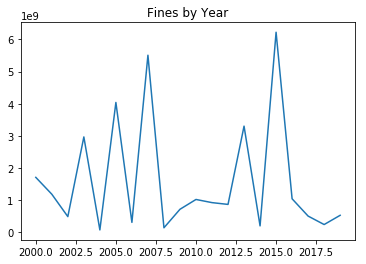

In [129]:
# plot the data

plt.plot(x_axis, y_axis)
plt.title('Fines by Year')
plt.show()

<h1> not really running this </h1>

In [94]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [95]:
sd = epa_cols_interest['penalty_amt'].std()
avg = epa_cols_interest['penalty_amt'].mean()

In [97]:
#normalize values
z_score = lambda x: ((x - avg) / float(sd))

# epa_cols_interest['normalized_amt'] = [z_score(val) for val in epa_cols_interest['penalty_amt']]

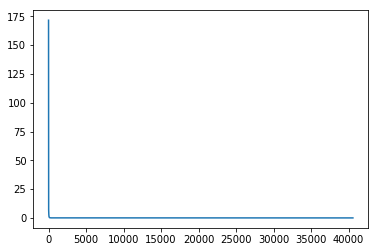

In [98]:
# test_set = sorted(epa['normalized_amt'])[::-1]
# test_set

# plt.plot(test_set)
# plt.show()